# How to properly prevent overfitting

**Objectives:**
- Give a `Validation Set` to the model
- Use the `Early Stopping` criterion to prevent the Neural network from overfitting
- `Regularize` your network

## Data 

First, let's generate some data thanks to the [`make_blob`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) function that we've already used yesterday.

❓ **Question** ❓ Generate 2000 samples, with 10 features each. 

There should be 8 classes of blobs (`centers` argument), with `cluster_std` equal to 7. 

Plot some dimensions to check your data.

In [45]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd 
%matplotlib inline

### YOUR CODE HERE

In [46]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=2000, n_features=10,centers=8,cluster_std =7)
y.shape
X.shape

(2000, 10)

❓ **Question** ❓ Use the `to_categorical` function from `tensorflow.keras` to convert `y` to `y_cat` which is the categorical representation of `y` with "*one-hot encoded*" columns.

In [47]:
from tensorflow.keras.utils import to_categorical 

In [48]:
y_cat = to_categorical(y)
y_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)


## Part I : Proper cross-validation

In a previous challenge, we split the dataset into a train set and a test set at the beginning of the notebook. 

And then, we started to build different models which were trained on the train set and evaluated on the test set.

So, at the end of the day, we used the test set everytime we evaluated our models and different hyperparameters. 

Therefore, we _used_ the test set to select our best model, which is a sort of ⚠️ `data-leakage` ⚠️.

A first good practice is to avoid using `random_state` or any deterministic separation between your train and test set. In that case, your test set will change everytime you re-run your notebook. But this is far from being sufficient.

To compare models properly, you have to run a cross-validation, a 10-fold split for instance. Let's see how to do it properly.

❓ **Question** ❓ First, write a function that generates a neural network with 3 layers:
- a layer with 25 neurons, the `relu` activation function and the appropriate `input_dim`
- a layer with 10 neurons and the `relu` activation function.
- a last layer which is suited to the problem at hand (multiclass classification)

The function should include a compilation method with :
- the `categorical_crossentropy` loss, 
- the `adam` optimizer 
- and the `accuracy` metrics.

In [49]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import cross_validate

In [50]:
def initialize_model():
    model = Sequential()
    model.add(layers.Dense(25,input_dim=10, activation='relu')) # 1
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(8, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    
    return model 
    model = initialize_model()
   # YOUR CODE HERE

Here, we will do a proper cross validation.

❓ **Question** ❓ Write a loop using the [K-Fold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) function from Scikit-Learn  (choose 10 splits) to fit your model on the train data, and evaluate it on the test data. Store the results of the evaluation into a `results` variable.

Do not forget to standardize your train data before fitting the neural network.

Also, 150 epochs should be sufficient for a first approximation

In [56]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

kf = KFold(n_splits=10)
kf.get_n_splits(X)

results = []

for train_index, test_index in kf.split(X):
    
    # Split the data into train and test
    ### YOUR CODE HERE
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_cat[train_index], y_cat[test_index]
    # Initialize the model
    ### YOUR CODE HERE
    model = initialize_model()
    # Fit the model on the train data
    ### YOUR CODE HERE
    model.fit(X_train, y_train,epochs=150, verbose=1)
    
    # Evaluate the model on the test data and append the result in the `results` variable
    ### YOUR CODE HERE
    result = model.evaluate(X_test, y_test, verbose=0)
    results.append(result)



Epoch 1/150
57/57 [==============================] - 0s 1ms/step - loss: 4.1830 - accuracy: 0.0939
Epoch 2/150
57/57 [==============================] - 0s 2ms/step - loss: 2.1938 - accuracy: 0.2222
Epoch 3/150
57/57 [==============================] - 0s 2ms/step - loss: 1.7782 - accuracy: 0.3200
Epoch 4/150
57/57 [==============================] - 0s 1ms/step - loss: 1.5178 - accuracy: 0.4178
Epoch 5/150
57/57 [==============================] - 0s 2ms/step - loss: 1.3083 - accuracy: 0.5339
Epoch 6/150
57/57 [==============================] - 0s 2ms/step - loss: 1.1300 - accuracy: 0.6122
Epoch 7/150
57/57 [==============================] - 0s 2ms/step - loss: 0.9793 - accuracy: 0.6750
Epoch 8/150
57/57 [==============================] - 0s 2ms/step - loss: 0.8628 - accuracy: 0.7094
Epoch 9/150
57/57 [==============================] - 0s 2ms/step - loss: 0.7733 - accuracy: 0.7361
Epoch 10/150
57/57 [==============================] - 0s 2ms/step - loss: 0.7101 - accuracy: 0.7561
Epoch 11/

57/57 [==============================] - 0s 1ms/step - loss: 0.3857 - accuracy: 0.8650
Epoch 83/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3855 - accuracy: 0.8583
Epoch 84/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3859 - accuracy: 0.8606
Epoch 85/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3836 - accuracy: 0.8622
Epoch 86/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3829 - accuracy: 0.8678
Epoch 87/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3840 - accuracy: 0.8617
Epoch 88/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3830 - accuracy: 0.8644
Epoch 89/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3818 - accuracy: 0.8606
Epoch 90/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3793 - accuracy: 0.8633
Epoch 91/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3821 - accuracy: 0.8661
Epoch 92/150


57/57 [==============================] - 0s 1ms/step - loss: 0.6414 - accuracy: 0.7828
Epoch 14/150
57/57 [==============================] - 0s 1ms/step - loss: 0.6198 - accuracy: 0.7906
Epoch 15/150
57/57 [==============================] - 0s 2ms/step - loss: 0.6034 - accuracy: 0.7917
Epoch 16/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5869 - accuracy: 0.7983
Epoch 17/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5744 - accuracy: 0.8050
Epoch 18/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5619 - accuracy: 0.8067
Epoch 19/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5550 - accuracy: 0.8094
Epoch 20/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5441 - accuracy: 0.8122
Epoch 21/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5339 - accuracy: 0.8183
Epoch 22/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5304 - accuracy: 0.8172
Epoch 23/150


57/57 [==============================] - 0s 1ms/step - loss: 0.3608 - accuracy: 0.8756
Epoch 96/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3600 - accuracy: 0.8706
Epoch 97/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3588 - accuracy: 0.8728
Epoch 98/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3563 - accuracy: 0.8761
Epoch 99/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3580 - accuracy: 0.8772
Epoch 100/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3568 - accuracy: 0.8739
Epoch 101/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3553 - accuracy: 0.8756
Epoch 102/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3546 - accuracy: 0.8733
Epoch 103/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3534 - accuracy: 0.8767
Epoch 104/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3556 - accuracy: 0.8761
Epoch 10

57/57 [==============================] - 0s 1ms/step - loss: 0.5222 - accuracy: 0.8161
Epoch 27/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5126 - accuracy: 0.8172
Epoch 28/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5037 - accuracy: 0.8233
Epoch 29/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4954 - accuracy: 0.8217
Epoch 30/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4900 - accuracy: 0.8250
Epoch 31/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4823 - accuracy: 0.8267
Epoch 32/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4772 - accuracy: 0.8272
Epoch 33/150
57/57 [==============================] - 0s 2ms/step - loss: 0.4786 - accuracy: 0.8294
Epoch 34/150
57/57 [==============================] - 0s 2ms/step - loss: 0.4658 - accuracy: 0.8272
Epoch 35/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4648 - accuracy: 0.8272
Epoch 36/150


Epoch 108/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3503 - accuracy: 0.8706
Epoch 109/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3476 - accuracy: 0.8722
Epoch 110/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3476 - accuracy: 0.8750
Epoch 111/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3488 - accuracy: 0.8717
Epoch 112/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3476 - accuracy: 0.8728
Epoch 113/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3461 - accuracy: 0.8711
Epoch 114/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3464 - accuracy: 0.8717
Epoch 115/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3431 - accuracy: 0.8706
Epoch 116/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3449 - accuracy: 0.8783
Epoch 117/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3444 - accurac

57/57 [==============================] - 0s 1ms/step - loss: 0.4239 - accuracy: 0.8500
Epoch 40/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4191 - accuracy: 0.8561
Epoch 41/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4138 - accuracy: 0.8528
Epoch 42/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4132 - accuracy: 0.8544
Epoch 43/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4181 - accuracy: 0.8528
Epoch 44/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4137 - accuracy: 0.8500
Epoch 45/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4105 - accuracy: 0.8511
Epoch 46/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4093 - accuracy: 0.8528
Epoch 47/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4058 - accuracy: 0.8578
Epoch 48/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4040 - accuracy: 0.8550
Epoch 49/150


57/57 [==============================] - 0s 2ms/step - loss: 0.3348 - accuracy: 0.8756
Epoch 121/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3315 - accuracy: 0.8811
Epoch 122/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3337 - accuracy: 0.8811
Epoch 123/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3281 - accuracy: 0.8806
Epoch 124/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3303 - accuracy: 0.8800
Epoch 125/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3305 - accuracy: 0.8794
Epoch 126/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3275 - accuracy: 0.8822
Epoch 127/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3283 - accuracy: 0.8867
Epoch 128/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3315 - accuracy: 0.8794
Epoch 129/150
57/57 [==============================] - 0s 2ms/step - loss: 0.3299 - accuracy: 0.8817
Epoc

57/57 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.8489
Epoch 52/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4063 - accuracy: 0.8494
Epoch 53/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4079 - accuracy: 0.8478
Epoch 54/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4046 - accuracy: 0.8506
Epoch 55/150
57/57 [==============================] - 0s 2ms/step - loss: 0.4014 - accuracy: 0.8494
Epoch 56/150
57/57 [==============================] - 0s 2ms/step - loss: 0.3987 - accuracy: 0.8533
Epoch 57/150
57/57 [==============================] - 0s 2ms/step - loss: 0.3988 - accuracy: 0.8544
Epoch 58/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3962 - accuracy: 0.8528
Epoch 59/150
57/57 [==============================] - 0s 2ms/step - loss: 0.3951 - accuracy: 0.8522
Epoch 60/150
57/57 [==============================] - 0s 2ms/step - loss: 0.3910 - accuracy: 0.8533
Epoch 61/150


57/57 [==============================] - 0s 1ms/step - loss: 0.3220 - accuracy: 0.8789
Epoch 133/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3223 - accuracy: 0.8750
Epoch 134/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3214 - accuracy: 0.8806
Epoch 135/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3205 - accuracy: 0.8750
Epoch 136/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3198 - accuracy: 0.8789
Epoch 137/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3185 - accuracy: 0.8750
Epoch 138/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3186 - accuracy: 0.8761
Epoch 139/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3197 - accuracy: 0.8800
Epoch 140/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3168 - accuracy: 0.8811
Epoch 141/150
57/57 [==============================] - 0s 2ms/step - loss: 0.3170 - accuracy: 0.8822
Epoc

Epoch 64/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4022 - accuracy: 0.8567
Epoch 65/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4038 - accuracy: 0.8572
Epoch 66/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3989 - accuracy: 0.8644
Epoch 67/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3958 - accuracy: 0.8617
Epoch 68/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3946 - accuracy: 0.8600
Epoch 69/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3975 - accuracy: 0.8589
Epoch 70/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3941 - accuracy: 0.8644
Epoch 71/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3939 - accuracy: 0.8572
Epoch 72/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3922 - accuracy: 0.8611
Epoch 73/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3906 - accuracy: 0.8667


57/57 [==============================] - 0s 2ms/step - loss: 0.3475 - accuracy: 0.8856
Epoch 146/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3457 - accuracy: 0.8833
Epoch 147/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3495 - accuracy: 0.8789
Epoch 148/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3464 - accuracy: 0.8783
Epoch 149/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3443 - accuracy: 0.8828
Epoch 150/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3451 - accuracy: 0.8833
Epoch 1/150
57/57 [==============================] - 0s 1ms/step - loss: 4.6851 - accuracy: 0.2167
Epoch 2/150
57/57 [==============================] - 0s 2ms/step - loss: 2.0617 - accuracy: 0.4472
Epoch 3/150
57/57 [==============================] - 0s 1ms/step - loss: 1.3609 - accuracy: 0.5739
Epoch 4/150
57/57 [==============================] - 0s 1ms/step - loss: 1.0679 - accuracy: 0.6444
Epoch 5/150


57/57 [==============================] - 0s 1ms/step - loss: 0.3754 - accuracy: 0.8644
Epoch 77/150
57/57 [==============================] - 0s 2ms/step - loss: 0.3742 - accuracy: 0.8656
Epoch 78/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3797 - accuracy: 0.8628
Epoch 79/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3759 - accuracy: 0.8611
Epoch 80/150
57/57 [==============================] - 0s 2ms/step - loss: 0.3737 - accuracy: 0.8667
Epoch 81/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3697 - accuracy: 0.8611
Epoch 82/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3720 - accuracy: 0.8667
Epoch 83/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3698 - accuracy: 0.8689
Epoch 84/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3656 - accuracy: 0.8689
Epoch 85/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3693 - accuracy: 0.8700
Epoch 86/150


57/57 [==============================] - 0s 1ms/step - loss: 0.9049 - accuracy: 0.6900
Epoch 8/150
57/57 [==============================] - 0s 1ms/step - loss: 0.7706 - accuracy: 0.7322
Epoch 9/150
57/57 [==============================] - 0s 1ms/step - loss: 0.6955 - accuracy: 0.7600
Epoch 10/150
57/57 [==============================] - 0s 1ms/step - loss: 0.6481 - accuracy: 0.7778
Epoch 11/150
57/57 [==============================] - 0s 1ms/step - loss: 0.6192 - accuracy: 0.7878
Epoch 12/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5937 - accuracy: 0.7961
Epoch 13/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5759 - accuracy: 0.8044
Epoch 14/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5585 - accuracy: 0.8106
Epoch 15/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5455 - accuracy: 0.8150
Epoch 16/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5308 - accuracy: 0.8200
Epoch 17/150
57

57/57 [==============================] - 0s 2ms/step - loss: 0.3555 - accuracy: 0.8783
Epoch 90/150
57/57 [==============================] - 0s 2ms/step - loss: 0.3553 - accuracy: 0.8767
Epoch 91/150
57/57 [==============================] - 0s 2ms/step - loss: 0.3542 - accuracy: 0.8756
Epoch 92/150
57/57 [==============================] - 0s 2ms/step - loss: 0.3524 - accuracy: 0.8767
Epoch 93/150
57/57 [==============================] - 0s 2ms/step - loss: 0.3515 - accuracy: 0.8789
Epoch 94/150
57/57 [==============================] - 0s 3ms/step - loss: 0.3518 - accuracy: 0.8833
Epoch 95/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3538 - accuracy: 0.8783
Epoch 96/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3494 - accuracy: 0.8822
Epoch 97/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3491 - accuracy: 0.8833
Epoch 98/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3473 - accuracy: 0.8839
Epoch 99/150


57/57 [==============================] - 0s 1ms/step - loss: 0.4987 - accuracy: 0.8250
Epoch 21/150
57/57 [==============================] - 0s 2ms/step - loss: 0.4890 - accuracy: 0.8250
Epoch 22/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4821 - accuracy: 0.8294
Epoch 23/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4738 - accuracy: 0.8311
Epoch 24/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4693 - accuracy: 0.8361
Epoch 25/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4691 - accuracy: 0.8306
Epoch 26/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4634 - accuracy: 0.8394
Epoch 27/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4578 - accuracy: 0.8406
Epoch 28/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4604 - accuracy: 0.8367
Epoch 29/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4478 - accuracy: 0.8422
Epoch 30/150


57/57 [==============================] - ETA: 0s - loss: 0.3391 - accuracy: 0.87 - 0s 2ms/step - loss: 0.3497 - accuracy: 0.8750
Epoch 103/150
57/57 [==============================] - 0s 2ms/step - loss: 0.3552 - accuracy: 0.8694
Epoch 104/150
57/57 [==============================] - 0s 2ms/step - loss: 0.3527 - accuracy: 0.8789
Epoch 105/150
57/57 [==============================] - 0s 2ms/step - loss: 0.3492 - accuracy: 0.8772
Epoch 106/150
57/57 [==============================] - 0s 2ms/step - loss: 0.3504 - accuracy: 0.8756
Epoch 107/150
57/57 [==============================] - 0s 2ms/step - loss: 0.3482 - accuracy: 0.8733
Epoch 108/150
57/57 [==============================] - 0s 2ms/step - loss: 0.3431 - accuracy: 0.8772
Epoch 109/150
57/57 [==============================] - 0s 2ms/step - loss: 0.3467 - accuracy: 0.8778
Epoch 110/150
57/57 [==============================] - 0s 2ms/step - loss: 0.3439 - accuracy: 0.8750
Epoch 111/150
57/57 [==============================] - 0s 2ms/s

57/57 [==============================] - 0s 2ms/step - loss: 0.4489 - accuracy: 0.8389
Epoch 34/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4404 - accuracy: 0.8422
Epoch 35/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4417 - accuracy: 0.8433
Epoch 36/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4346 - accuracy: 0.8433
Epoch 37/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4328 - accuracy: 0.8439
Epoch 38/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4289 - accuracy: 0.8456
Epoch 39/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4305 - accuracy: 0.8433
Epoch 40/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4259 - accuracy: 0.8461
Epoch 41/150
57/57 [==============================] - 0s 3ms/step - loss: 0.4247 - accuracy: 0.8450
Epoch 42/150
57/57 [==============================] - 0s 2ms/step - loss: 0.4217 - accuracy: 0.8428
Epoch 43/150


57/57 [==============================] - 0s 2ms/step - loss: 0.3533 - accuracy: 0.8728
Epoch 115/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3472 - accuracy: 0.8800
Epoch 116/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3492 - accuracy: 0.8756
Epoch 117/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3484 - accuracy: 0.8744
Epoch 118/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3478 - accuracy: 0.8756
Epoch 119/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3513 - accuracy: 0.8761
Epoch 120/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3455 - accuracy: 0.8767
Epoch 121/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3436 - accuracy: 0.8833
Epoch 122/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3447 - accuracy: 0.8761
Epoch 123/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3454 - accuracy: 0.8761
Epoc

AttributeError: 'list' object has no attribute 'mean'

In [58]:
df = pd.DataFrame(results)
mean = df[1].mean()

In [59]:
mean

0.7789999961853027

In [26]:
model.evaluate(X_test, y_test, verbose=1)

7/7 [==============================] - 0s 2ms/step - loss: 0.7560 - accuracy: 0.7550


[0.7559946179389954, 0.7549999952316284]

❓ **Question** ❓ Print the mean accuracy, and its standard deviation

In [60]:
mean

0.7789999961853027

❗ **Remark** ❗ You probably encountered one of the main drawbacks of using a proper cross-validation for a Neural Network: **it takes a lot of time** ! Therefore, for the rest of the Deep-Learning module, we will do **only one split**. But remember that this is not entirely correct and, for real-life applications and problems, you are encouraged to use a proper cross-validation technique.

❗ **Remark** ❗ In general, what practitioners do, is that they split only once, as you did. And once they get to the end of their optimization, they launch a real cross-validation at 6pm, go home and get the final results on the next day.

❓ **Question** ❓ For the rest of the exercise (and of the Deep Learning module), split the dataset into a train set and a test set with a 70/30% training to test data ratio.



In [61]:
### YOUR CODE HERE
from sklearn.model_selection import train_test_split
X_train, X_test, y_cat_train, y_cat_test = train_test_split(X, y_cat, test_size=0.30, random_state=0)

## Part II : Stop the learning process before overfitting

Let's first show that if we train the model for too long, too many epochs, it will overfit the training data and will not be good at predicting on the test data.

❓ **Question** ❓ To do it, train the same neural network (⚠️ do not forget to re-initialize it ⚠️) with `validation_data=(X_test, y_test)` and 500 epochs. Store the history in a `history` variable.

In [63]:
### YOUR CODE HERE
history = model.fit(X_train, y_cat_train, 
                    validation_data=(X_test, y_cat_test),epochs=500,
verbose=1) 

Epoch 1/500
44/44 [==============================] - 0s 3ms/step - loss: 0.3716 - accuracy: 0.8693 - val_loss: 0.3942 - val_accuracy: 0.8667
Epoch 2/500
44/44 [==============================] - 0s 3ms/step - loss: 0.3556 - accuracy: 0.8729 - val_loss: 0.4133 - val_accuracy: 0.8583
Epoch 3/500
44/44 [==============================] - 0s 3ms/step - loss: 0.3519 - accuracy: 0.8743 - val_loss: 0.4236 - val_accuracy: 0.8550
Epoch 4/500
44/44 [==============================] - 0s 3ms/step - loss: 0.3474 - accuracy: 0.8821 - val_loss: 0.4372 - val_accuracy: 0.8583
Epoch 5/500
44/44 [==============================] - 0s 3ms/step - loss: 0.3404 - accuracy: 0.8771 - val_loss: 0.4320 - val_accuracy: 0.8467
Epoch 6/500
44/44 [==============================] - 0s 3ms/step - loss: 0.3397 - accuracy: 0.8814 - val_loss: 0.4441 - val_accuracy: 0.8517
Epoch 7/500
44/44 [==============================] - 0s 3ms/step - loss: 0.3360 - accuracy: 0.8743 - val_loss: 0.4614 - val_accuracy: 0.8450
Epoch 8/500
4

Epoch 59/500
44/44 [==============================] - 0s 2ms/step - loss: 0.2798 - accuracy: 0.8993 - val_loss: 0.6315 - val_accuracy: 0.8150
Epoch 60/500
44/44 [==============================] - 0s 2ms/step - loss: 0.2767 - accuracy: 0.9000 - val_loss: 0.6349 - val_accuracy: 0.8100
Epoch 61/500
44/44 [==============================] - 0s 2ms/step - loss: 0.2738 - accuracy: 0.9071 - val_loss: 0.6367 - val_accuracy: 0.8100
Epoch 62/500
44/44 [==============================] - 0s 2ms/step - loss: 0.2754 - accuracy: 0.9007 - val_loss: 0.6381 - val_accuracy: 0.8150
Epoch 63/500
44/44 [==============================] - 0s 2ms/step - loss: 0.2734 - accuracy: 0.9057 - val_loss: 0.6535 - val_accuracy: 0.8100
Epoch 64/500
44/44 [==============================] - 0s 3ms/step - loss: 0.2756 - accuracy: 0.9064 - val_loss: 0.6596 - val_accuracy: 0.7983
Epoch 65/500
44/44 [==============================] - 0s 2ms/step - loss: 0.2764 - accuracy: 0.9114 - val_loss: 0.6514 - val_accuracy: 0.8050
Epoch 

44/44 [==============================] - 0s 2ms/step - loss: 0.2485 - accuracy: 0.9129 - val_loss: 0.7799 - val_accuracy: 0.7950
Epoch 117/500
44/44 [==============================] - 0s 2ms/step - loss: 0.2433 - accuracy: 0.9164 - val_loss: 0.7832 - val_accuracy: 0.7900
Epoch 118/500
44/44 [==============================] - 0s 2ms/step - loss: 0.2433 - accuracy: 0.9171 - val_loss: 0.7839 - val_accuracy: 0.7917
Epoch 119/500
44/44 [==============================] - 0s 2ms/step - loss: 0.2415 - accuracy: 0.9171 - val_loss: 0.7943 - val_accuracy: 0.7933
Epoch 120/500
44/44 [==============================] - 0s 4ms/step - loss: 0.2421 - accuracy: 0.9200 - val_loss: 0.8055 - val_accuracy: 0.7833
Epoch 121/500
44/44 [==============================] - 0s 5ms/step - loss: 0.2402 - accuracy: 0.9186 - val_loss: 0.8049 - val_accuracy: 0.7917
Epoch 122/500
44/44 [==============================] - 0s 3ms/step - loss: 0.2444 - accuracy: 0.9171 - val_loss: 0.7975 - val_accuracy: 0.7967
Epoch 123/500

44/44 [==============================] - 0s 3ms/step - loss: 0.2179 - accuracy: 0.9264 - val_loss: 0.9414 - val_accuracy: 0.7867
Epoch 174/500
44/44 [==============================] - 0s 2ms/step - loss: 0.2185 - accuracy: 0.9250 - val_loss: 0.9574 - val_accuracy: 0.7850
Epoch 175/500
44/44 [==============================] - 0s 2ms/step - loss: 0.2181 - accuracy: 0.9236 - val_loss: 0.9502 - val_accuracy: 0.7800
Epoch 176/500
44/44 [==============================] - 0s 2ms/step - loss: 0.2215 - accuracy: 0.9186 - val_loss: 0.9615 - val_accuracy: 0.7800
Epoch 177/500
44/44 [==============================] - 0s 2ms/step - loss: 0.2195 - accuracy: 0.9193 - val_loss: 0.9521 - val_accuracy: 0.7850
Epoch 178/500
44/44 [==============================] - 0s 3ms/step - loss: 0.2181 - accuracy: 0.9250 - val_loss: 0.9598 - val_accuracy: 0.7833
Epoch 179/500
44/44 [==============================] - 0s 3ms/step - loss: 0.2176 - accuracy: 0.9250 - val_loss: 0.9710 - val_accuracy: 0.7800
Epoch 180/500

44/44 [==============================] - 0s 2ms/step - loss: 0.1989 - accuracy: 0.9321 - val_loss: 1.1069 - val_accuracy: 0.7733
Epoch 231/500
44/44 [==============================] - 0s 2ms/step - loss: 0.1997 - accuracy: 0.9329 - val_loss: 1.1015 - val_accuracy: 0.7783
Epoch 232/500
44/44 [==============================] - 0s 2ms/step - loss: 0.1972 - accuracy: 0.9343 - val_loss: 1.1139 - val_accuracy: 0.7783
Epoch 233/500
44/44 [==============================] - 0s 2ms/step - loss: 0.1975 - accuracy: 0.9350 - val_loss: 1.1525 - val_accuracy: 0.7733
Epoch 234/500
44/44 [==============================] - 0s 2ms/step - loss: 0.2036 - accuracy: 0.9329 - val_loss: 1.1142 - val_accuracy: 0.7800
Epoch 235/500
44/44 [==============================] - 0s 2ms/step - loss: 0.1949 - accuracy: 0.9386 - val_loss: 1.1435 - val_accuracy: 0.7717
Epoch 236/500
44/44 [==============================] - 0s 2ms/step - loss: 0.1936 - accuracy: 0.9393 - val_loss: 1.1266 - val_accuracy: 0.7700
Epoch 237/500

44/44 [==============================] - 0s 2ms/step - loss: 0.1804 - accuracy: 0.9414 - val_loss: 1.2936 - val_accuracy: 0.7683
Epoch 288/500
44/44 [==============================] - 0s 2ms/step - loss: 0.1785 - accuracy: 0.9450 - val_loss: 1.2987 - val_accuracy: 0.7717
Epoch 289/500
44/44 [==============================] - 0s 2ms/step - loss: 0.1778 - accuracy: 0.9414 - val_loss: 1.3148 - val_accuracy: 0.7650
Epoch 290/500
44/44 [==============================] - 0s 2ms/step - loss: 0.1740 - accuracy: 0.9514 - val_loss: 1.2936 - val_accuracy: 0.7717
Epoch 291/500
44/44 [==============================] - 0s 2ms/step - loss: 0.1788 - accuracy: 0.9471 - val_loss: 1.2954 - val_accuracy: 0.7650
Epoch 292/500
44/44 [==============================] - 0s 2ms/step - loss: 0.1800 - accuracy: 0.9407 - val_loss: 1.3337 - val_accuracy: 0.7617
Epoch 293/500
44/44 [==============================] - 0s 2ms/step - loss: 0.1782 - accuracy: 0.9429 - val_loss: 1.3267 - val_accuracy: 0.7667
Epoch 294/500

44/44 [==============================] - 0s 2ms/step - loss: 0.1617 - accuracy: 0.9557 - val_loss: 1.5025 - val_accuracy: 0.7550
Epoch 345/500
44/44 [==============================] - 0s 2ms/step - loss: 0.1629 - accuracy: 0.9479 - val_loss: 1.5001 - val_accuracy: 0.7533
Epoch 346/500
44/44 [==============================] - 0s 2ms/step - loss: 0.1613 - accuracy: 0.9521 - val_loss: 1.4912 - val_accuracy: 0.7600
Epoch 347/500
44/44 [==============================] - 0s 2ms/step - loss: 0.1621 - accuracy: 0.9500 - val_loss: 1.5068 - val_accuracy: 0.7583
Epoch 348/500
44/44 [==============================] - 0s 2ms/step - loss: 0.1610 - accuracy: 0.9500 - val_loss: 1.5157 - val_accuracy: 0.7533
Epoch 349/500
44/44 [==============================] - 0s 2ms/step - loss: 0.1639 - accuracy: 0.9486 - val_loss: 1.4960 - val_accuracy: 0.7600
Epoch 350/500
44/44 [==============================] - 0s 2ms/step - loss: 0.1660 - accuracy: 0.9486 - val_loss: 1.5123 - val_accuracy: 0.7583
Epoch 351/500

44/44 [==============================] - 0s 2ms/step - loss: 0.1495 - accuracy: 0.9614 - val_loss: 1.7105 - val_accuracy: 0.7550
Epoch 402/500
44/44 [==============================] - 0s 2ms/step - loss: 0.1511 - accuracy: 0.9493 - val_loss: 1.6853 - val_accuracy: 0.7617
Epoch 403/500
44/44 [==============================] - 0s 2ms/step - loss: 0.1530 - accuracy: 0.9493 - val_loss: 1.6835 - val_accuracy: 0.7567
Epoch 404/500
44/44 [==============================] - 0s 2ms/step - loss: 0.1472 - accuracy: 0.9536 - val_loss: 1.6864 - val_accuracy: 0.7467
Epoch 405/500
44/44 [==============================] - 0s 2ms/step - loss: 0.1502 - accuracy: 0.9507 - val_loss: 1.6930 - val_accuracy: 0.7550
Epoch 406/500
44/44 [==============================] - 0s 2ms/step - loss: 0.1482 - accuracy: 0.9550 - val_loss: 1.6886 - val_accuracy: 0.7583
Epoch 407/500
44/44 [==============================] - 0s 2ms/step - loss: 0.1478 - accuracy: 0.9557 - val_loss: 1.6526 - val_accuracy: 0.7583
Epoch 408/500

44/44 [==============================] - 0s 2ms/step - loss: 0.1329 - accuracy: 0.9579 - val_loss: 1.8829 - val_accuracy: 0.7450
Epoch 459/500
44/44 [==============================] - 0s 2ms/step - loss: 0.1320 - accuracy: 0.9607 - val_loss: 1.8637 - val_accuracy: 0.7633
Epoch 460/500
44/44 [==============================] - 0s 2ms/step - loss: 0.1367 - accuracy: 0.9557 - val_loss: 1.8368 - val_accuracy: 0.7567
Epoch 461/500
44/44 [==============================] - 0s 2ms/step - loss: 0.1378 - accuracy: 0.9593 - val_loss: 1.8957 - val_accuracy: 0.7500
Epoch 462/500
44/44 [==============================] - 0s 2ms/step - loss: 0.1349 - accuracy: 0.9564 - val_loss: 1.8674 - val_accuracy: 0.7567
Epoch 463/500
44/44 [==============================] - 0s 2ms/step - loss: 0.1315 - accuracy: 0.9629 - val_loss: 1.8710 - val_accuracy: 0.7550
Epoch 464/500
44/44 [==============================] - 0s 2ms/step - loss: 0.1296 - accuracy: 0.9643 - val_loss: 1.8778 - val_accuracy: 0.7550
Epoch 465/500

❓ **Question** ❓ Evaluate the model on the test set and print the accuracy

In [66]:
### YOUR CODE HERE
model.evaluate(X_test, y_cat_test, verbose=0)
accuracy = 0.746666669845581

❓ **Question** ❓ Plot the history of the model with the following function : 

In [67]:
def plot_loss_accuracy(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(20,7))
    
    # --- LOSS --- 
    
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylim((0,3))
    ax[0].legend(['Train', 'Test'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)
    
    # --- ACCURACY
    
    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])
    ax[1].set_title('Model Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Test'], loc='best')
    ax[1].set_ylim((0,1))
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)
    
    if title:
        fig.suptitle(title)

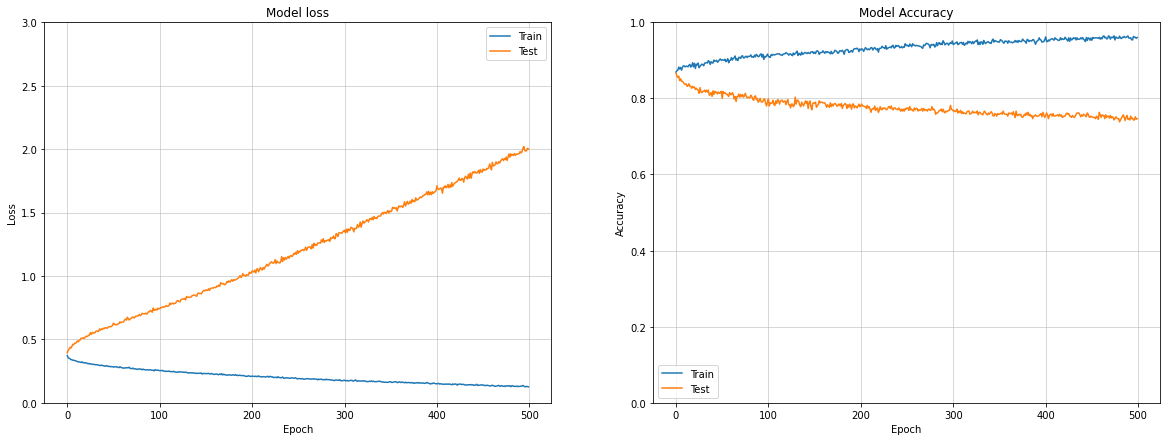

In [73]:
# YOUR CODE HERE
plot_loss_accuracy(history)

We clearly see that the number of epochs we chose has a great influence on the final results: 

* `Unsufficient number of  epochs` $\rightarrow$ `Underfitting`:
    * The algorithm is not optimal as its loss function has not converged yet, 
    * i.e. it hasn't learnt enough from the training data. 
* `Too many epochs` $\rightarrow$ `Overfitting`: 
    * Our neural network has learnt too much from the training data, even its noisy information... 
    * and the algorithm does not generalize well on test data.

What we want is basically to ***stop the algorithm when the test loss is minimal*** (or when the test accuracy is maximal).

Let's introduce the **`Early Stopping`** criterion.

The ES criterion is a way to automatically stop the training of the algorithm before the end, before the final number of epochs originally set.

❓ How does it work ❓

Basically, it uses part of the dataset to check whether the test loss has stopped improving. You cannot use the test data itself to check that, otherwise, it is some kind of data leakage. Instead, we will use a subset of the initial training data, called the **`validation set`**

It basically looks like the following 👇

<img src="validation_set.png" alt="Validation set" style="height:350px;"/>

To split this data, we use the **`validation_split`** keyword which sets the percentage of data from the initial training set used in the validation set.

You need to specify it when fitting the model in the `.fit()`. -

On top of that, we use the **`callbacks`** keyword to call the Early Stopping criterion at the end of each epoch. You can check additional information in the [documentation](https://www.tensorflow.org/guide/keras/train_and_evaluate)


❓ **Question** ❓ Launch the following code, plot the history and evaluate it on the test set

In [74]:
%%time

from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping()

model = initialize_model()

# Fit the model on the train data
history = model.fit(X_train, y_train,
                    validation_split=0.3,
                    epochs=500,
                    batch_size=16, 
                    verbose=1, 
                    callbacks=[es])

Epoch 1/500
62/62 [==============================] - 1s 4ms/step - loss: 3.0046 - accuracy: 0.1318 - val_loss: 2.7023 - val_accuracy: 0.0998
CPU times: user 698 ms, sys: 44.5 ms, total: 742 ms
Wall time: 697 ms


In [0]:
# YOUR CODE HERE

❗ **Remark** ❗ The problem, with this type of approach, is that as soon as the loss of the validation set increases, the model stops. However, as a neural network's convergence is stochastic, it happens that the loss slightly increases before decreasing again. For this reason, the `Early Stopping` criterion has a **`patience`** keyword that `defines how many consecutive epochs without any loss decrease` are allowed before we stop the training procedure.

❓ **Question** ❓ Use the Early Stopping criterion with a patience of 30 epochs, plot the results and print the accuracy on the test set

In [75]:
### YOUR CODE HERE
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping()

model.fit(X_train, y_train, 
          batch_size=16, 
          epochs=30, 
          validation_split=0.3,
          callbacks=[es])

Epoch 1/30
62/62 [==============================] - 0s 2ms/step - loss: 2.3974 - accuracy: 0.1328 - val_loss: 2.4001 - val_accuracy: 0.1164


In [78]:
model.evaluate(X_train, y_cat_train, verbose=0)
accuracy = 0.16571427881717682
accuracy

0.16571427881717682

❗ **Remark** ❗ The model continues to converge even though its loss functions have some consecutive loss increases and decreases. 

The `patience` number  to select is highly related to the task at hand and there is not any general rule of thumb. 

❗ **Remark** ❗ If you selected a high patience value, you might face the problem that the loss on the validation set has increased again a lot compared to its lowest value. To that end, the Early Stopping criterion enables you to stop the convergence _and_ **`restore the best weights of the neural network when it had the best score on the validation set`**, thanks to **`restore_best_weights = True`** (that is set to `False` by default).

❓ **Question** ❓ Run the model with a Early Stopping criterion that will restore the best weights of the Neural Net, plot the loss and accuracy and print the accuracy on the test set

In [80]:
### YOUR CODE HERE
es = EarlyStopping(patience=20, restore_best_weights=True)

model.fit(X_train, y_train, 
          batch_size=16, 
          epochs=30, 
          validation_split=0.3,
          callbacks=[es])

Epoch 1/30
62/62 [==============================] - 0s 5ms/step - loss: 2.0007 - accuracy: 0.1920 - val_loss: 2.1367 - val_accuracy: 0.1188
Epoch 2/30
62/62 [==============================] - 0s 4ms/step - loss: 1.9979 - accuracy: 0.1859 - val_loss: 2.1347 - val_accuracy: 0.1164
Epoch 3/30
62/62 [==============================] - 0s 4ms/step - loss: 1.9941 - accuracy: 0.1961 - val_loss: 2.1365 - val_accuracy: 0.1211
Epoch 4/30
62/62 [==============================] - 0s 4ms/step - loss: 1.9913 - accuracy: 0.1971 - val_loss: 2.1378 - val_accuracy: 0.1330
Epoch 5/30
62/62 [==============================] - 0s 4ms/step - loss: 1.9887 - accuracy: 0.1961 - val_loss: 2.1402 - val_accuracy: 0.1330
Epoch 6/30
62/62 [==============================] - 0s 4ms/step - loss: 1.9864 - accuracy: 0.1931 - val_loss: 2.1422 - val_accuracy: 0.1283
Epoch 7/30
62/62 [==============================] - 0s 3ms/step - loss: 1.9842 - accuracy: 0.1971 - val_loss: 2.1439 - val_accuracy: 0.1354
Epoch 8/30
62/62 [==

❗ **Remark 1** ❗ You can look at the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) to play with other parameters

❗ **Remark 2** ❗ No longer need to have a look at the epochs as long as the model hits the stopping criterion. So, in the future, you should set a large number of epochs and the early stopping criterion will take care of stopping the training procedure before the model overfits. 

## Part III : Batch-size & Epochs

❓ **Question** ❓ Let's run the previous model with different batch sizes (with the Early Stopping criterion included) and plot the results.

CPU times: user 54.6 s, sys: 8.6 s, total: 1min 3s
Wall time: 40.9 s


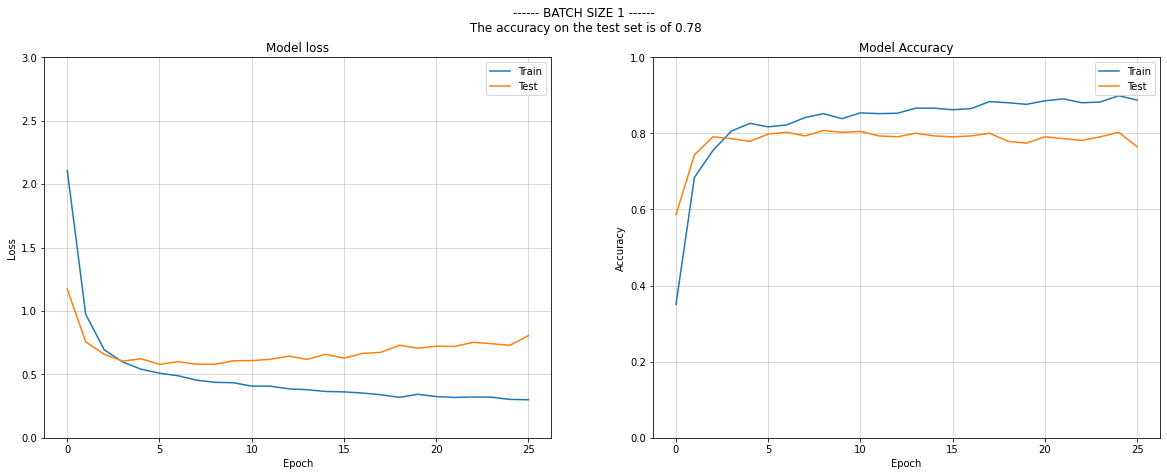

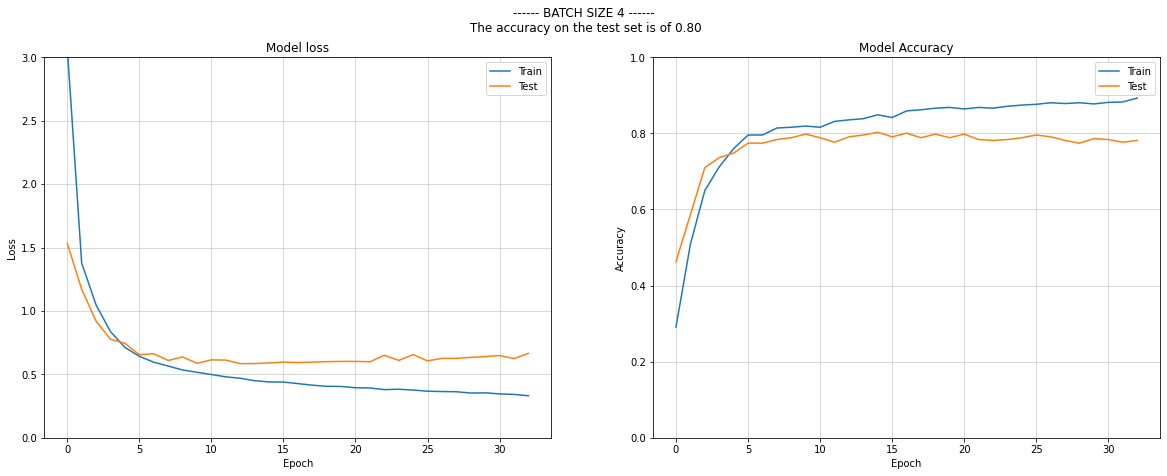

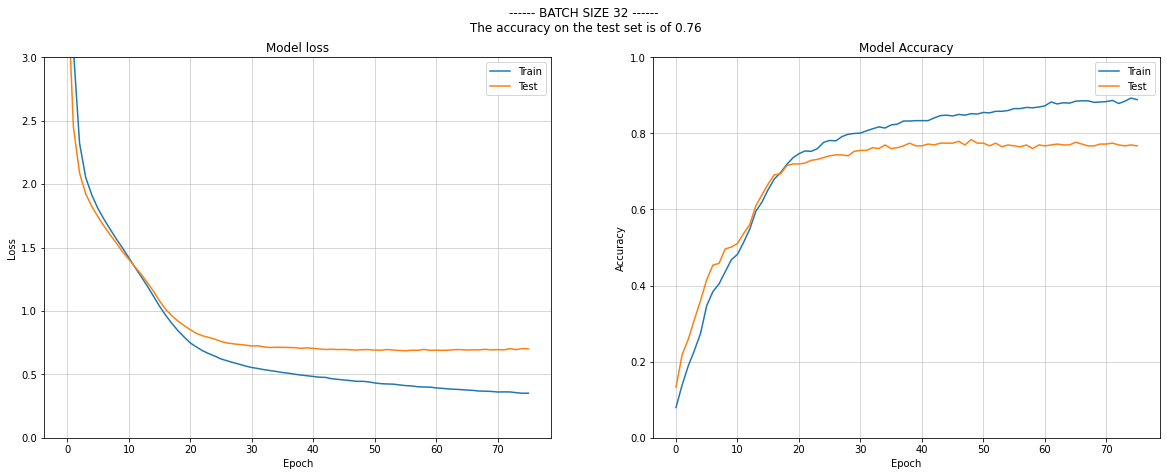

In [82]:
%%time
# RUN THIS CELL (it can take some time...)

es = EarlyStopping(patience=20, restore_best_weights=True)

for batch_size in [1, 4, 32]:
    
    model = initialize_model()

    history = model.fit(X_train, y_cat_train,
                        validation_split=0.3,
                        epochs=500,
                        batch_size=batch_size, 
                        verbose=0, 
                        callbacks=[es])

    results = model.evaluate(X_test, y_cat_test, verbose=0)
    plot_loss_accuracy(history, title=f'------ BATCH SIZE {batch_size} ------\n The accuracy on the test set is of {results[1]:.2f}')

❓ **Question** ❓ Look at the oscillations of the accuracy and the loss with respect to the batch size number. Is this coherent with what we saw when playing with the Tensorflow Playground? 

In [0]:
# YOUR ANSWER
#yes

❓ **Questions** ❓ 
* How many optimizations of the weights are done within one epoch (with respect to the number of observations and the batch size)? 
* Therefore, is one epoch longer with a large or a small batch size?

# Part IV: Regularization

In this part of the notebook, we will see how to use `**regularizers**` in a neural network. 

Regularizers are used to `prevent overfitting` that can happen because very complex networks have many  parameters which tends to overfit the training data.

First, let's initialize a model that has too many parameters for the task (many layers and/or many neurons) such that it overfits the training data  
**To better see the effect, we will not use any early stopping criterion**

The accuracy on the test set is of 0.73


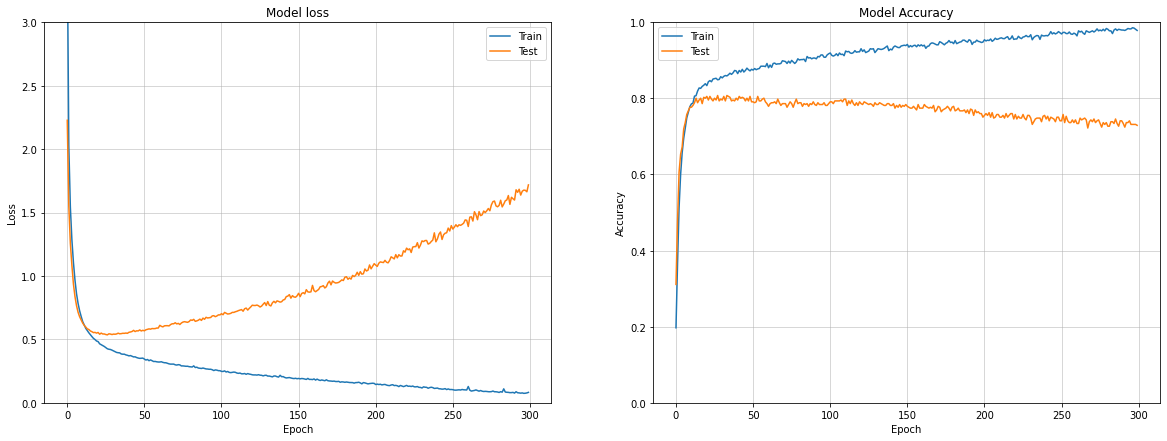

In [87]:
# RUN THIS CELL
from tensorflow.keras import regularizers, Sequential, layers
#reg_l1_l2 = regularizers.l1_l2(l1=0.005, l2=0.0005)
reg_l2 = regularizers.L2(0.01)
model = models.Sequential()
model.add(layers.Dense(25, activation='relu', input_dim=10))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))

# Model compilation
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_cat_train,  validation_split=0.3,
                    epochs=300, batch_size=16, verbose=0)

results = model.evaluate(X_test, y_cat_test, verbose=0)
print(f'The accuracy on the test set is of {results[1]:.2f}')
plot_loss_accuracy(history)

☝️ In our *overparametrized network*, some neurons became too specific to given training data, preventing the network from generalizing to new data. 

😕 This led to some overfitting. 

⚔️ We discovered the Early Stopping criterion as a weapon to fight overfitting.

Two additional tools can be used to fight overfitting, they are specific layers:

* ✂️ <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout">**`Dropout Layers`**</a> : 
    * Their role is to _cancel_ the output of some neurons  during the training part. 
    * By doing this at random, it prevents the network from getting too specific to the input data : no any neuron can be too specific to a given input as its output is sometimes cancelled by the Dropout Layer. Overall, it forces the information that is contained in one input sample to go through multiple neurons instead of only one specific neuron.

* 👮🏻‍♀️ <a href="https://www.tensorflow.org/api_docs/python/tf/keras/regularizers">**`Regularizers`**</a>: as Sequential Dense Neural Networks are simple activated linear regressions, the weights can be constrained using L1, L2 or L1-L2 penalties! Wow!


❓ **Question** ❓ Try to add dropout layers and regularization to all your layers of the above neural network and look at the effect on the loss on the test set.

🏁 **Congratulations!** 

Don't forget to commit and push your challenge